In [828]:
# Importing all the required libaries
import time
import random
from math import *
import operator
import xgboost as xgb
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

#importing the tree's
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [829]:
df_test = pd.read_csv(r'E:\A.I course\Machine Learning - Project for submission\Machine-Learning--Projects-master\Mercedes-Benz Greener Manufacturing/test.csv')
df_train = pd.read_csv(r'E:\A.I course\Machine Learning - Project for submission\Machine-Learning--Projects-master\Mercedes-Benz Greener Manufacturing/train.csv')

In [830]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [831]:
df_test.shape

(4209, 377)

In [832]:
df_test.isnull().sum()

ID      0
X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
X31     0
       ..
X355    0
X356    0
X357    0
X358    0
X359    0
X360    0
X361    0
X362    0
X363    0
X364    0
X365    0
X366    0
X367    0
X368    0
X369    0
X370    0
X371    0
X372    0
X373    0
X374    0
X375    0
X376    0
X377    0
X378    0
X379    0
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 377, dtype: int64

In [833]:
df_train.shape

(4209, 378)

In [834]:
df_train.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
       ..
X355    0
X356    0
X357    0
X358    0
X359    0
X360    0
X361    0
X362    0
X363    0
X364    0
X365    0
X366    0
X367    0
X368    0
X369    0
X370    0
X371    0
X372    0
X373    0
X374    0
X375    0
X376    0
X377    0
X378    0
X379    0
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [835]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [836]:
df_train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [837]:
df_test.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [838]:
df = pd.concat([df_train,df_test], sort = True)

In [839]:
df.head()

,ID,X0,X1,X10,X100,X101,X102,X103,X104,X105,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,y
0,0,k,v,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,130.81
1,6,k,t,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,88.53
2,7,az,w,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,76.26
3,9,az,t,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,80.62
4,13,az,v,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,78.02


In [840]:
df.shape

(8418, 378)

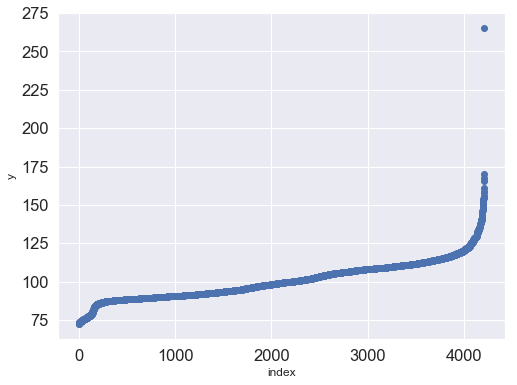

In [841]:
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

In [842]:
df.isnull().any()

ID      False
X0      False
X1      False
X10     False
X100    False
X101    False
X102    False
X103    False
X104    False
X105    False
X106    False
X107    False
X108    False
X109    False
X11     False
X110    False
X111    False
X112    False
X113    False
X114    False
X115    False
X116    False
X117    False
X118    False
X119    False
X12     False
X120    False
X122    False
X123    False
X124    False
        ...  
X71     False
X73     False
X74     False
X75     False
X76     False
X77     False
X78     False
X79     False
X8      False
X80     False
X81     False
X82     False
X83     False
X84     False
X85     False
X86     False
X87     False
X88     False
X89     False
X90     False
X91     False
X92     False
X93     False
X94     False
X95     False
X96     False
X97     False
X98     False
X99     False
y        True
Length: 378, dtype: bool

# Handling the NaN values and replacing it with the mean 

In [843]:
df['y'].head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [844]:
df =df.dropna()
df

,ID,X0,X1,X10,X100,X101,X102,X103,X104,X105,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,y
0,0,k,v,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,130.81
1,6,k,t,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,88.53
2,7,az,w,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,76.26
3,9,az,t,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,80.62
4,13,az,v,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,78.02
5,18,t,b,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,92.93
6,24,al,r,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,128.76
7,25,o,l,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,91.91
8,27,w,s,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,108.67
9,30,j,b,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,126.99


In [845]:
mean = np.mean(df['y'])
mean
df = df.fillna(mean)

In [846]:
df.head()

,ID,X0,X1,X10,X100,X101,X102,X103,X104,X105,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,y
0,0,k,v,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,130.81
1,6,k,t,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,88.53
2,7,az,w,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,76.26
3,9,az,t,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,80.62
4,13,az,v,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,78.02


In [847]:
#Apply lable encoder to convert categorical data into numerical data
Le = LabelEncoder()

In [848]:
for f in ["ID","X0", "X1","X8","X2","X3","X4","X5","X6"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[f].values)) 
        df[f] = lbl.transform(list(df[f].values))

In [849]:
df.head()

,ID,X0,X1,X10,X100,X101,X102,X103,X104,X105,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,y
0,0,32,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,130.81
1,1,32,21,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,88.53
2,2,20,24,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,76.26
3,3,20,21,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,80.62
4,4,20,23,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,78.02


In [850]:
# The categorical data has been converted into numerical

# VarianceThreshold feature selection

In [851]:
from sklearn.feature_selection import VarianceThreshold


In [852]:
# Create VarianceThreshold object with a variance with a threshold of 0
thresholder = VarianceThreshold(threshold=0)

In [853]:
X_high_variance = thresholder.fit_transform(df)

In [854]:
X_high_variance[0:5]

array([[  0.  ,  32.  ,  23.  , ...,   0.  ,   0.  , 130.81],
       [  1.  ,  32.  ,  21.  , ...,   1.  ,   0.  ,  88.53],
       [  2.  ,  20.  ,  24.  , ...,   1.  ,   0.  ,  76.26],
       [  3.  ,  20.  ,  21.  , ...,   1.  ,   0.  ,  80.62],
       [  4.  ,  20.  ,  23.  , ...,   1.  ,   0.  ,  78.02]])

In [855]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4209 entries, 0 to 4208
Columns: 378 entries, ID to y
dtypes: float64(1), int64(377)
memory usage: 12.2 MB


In [856]:
# We need to drop columns with variance = 0

In [857]:
df.shape

(4209, 378)

In [858]:
df.loc[:, df.var() == 0]

,X107,X11,X233,X235,X268,X289,X290,X293,X297,X330,X347,X93
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0


In [859]:
df.drop(["X107","X11","X233","X235","X268","X289","X290","X293","X297","X330","X347","X93"], axis=1, inplace=True)

In [860]:
df.shape

(4209, 366)

In [861]:
y = df.iloc[:,-1].values
y

array([130.81,  88.53,  76.26, ..., 109.22,  87.48, 110.85])

In [862]:
df_x = df.iloc[:,:-1].values 
df_x

array([[   0,   32,   23, ...,    0,    0,    0],
       [   1,   32,   21, ...,    0,    1,    0],
       [   2,   20,   24, ...,    0,    1,    0],
       ...,
       [4206,    8,   23, ...,    0,    1,    0],
       [4207,    9,   19, ...,    0,    1,    0],
       [4208,   46,   19, ...,    0,    1,    0]], dtype=int64)

# Scale the data using standard scaler

In [863]:
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df_x)
print(df_scaler)

[[-1.73163935  0.16301209  1.39348787 ... -0.06553562 -4.0487729
  -0.09288104]
 [-1.73081632  0.16301209  1.15902093 ... -0.06553562  0.24698841
  -0.09288104]
 [-1.7299933  -0.71055977  1.51072134 ... -0.06553562  0.24698841
  -0.09288104]
 ...
 [ 1.7299933  -1.58413164  1.39348787 ... -0.06553562  0.24698841
  -0.09288104]
 [ 1.73081632 -1.51133398  0.924554   ... -0.06553562  0.24698841
  -0.09288104]
 [ 1.73163935  1.18217927  0.924554   ... -0.06553562  0.24698841
  -0.09288104]]


C:\Users\HI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\HI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Dimensionality Reduction

In [864]:
# Perform PCA, converting 376 features into 5 features
pca = PCA(n_components=1)

In [865]:
# fitting the scaled data
pca.fit(df_scaler)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [866]:
# The scaled data has 376 features
df_scaler.shape

(4209, 365)

In [867]:
df_pca = pca.transform(df_scaler)

In [868]:
# With this the features of the scaled data has been reduced from 376 features to 5 features
df_pca.shape

(4209, 1)

In [869]:
df_pca

array([[12.24765064],
       [-0.10766494],
       [10.27286793],
       ...,
       [ 0.44233216],
       [-1.33646898],
       [-2.16300057]])

In [870]:
type(df_pca), type(y)

(numpy.ndarray, numpy.ndarray)

# Perform a train test split

In [871]:
x_train,x_test,y_train,y_test = train_test_split(df_pca,y, test_size = 0.33, random_state =123)

In [872]:
x_train.shape,x_test.shape,y_train.shape, y_test.shape

((2820, 1), (1389, 1), (2820,), (1389,))

In [873]:
x_train.size,x_test.size,y_train.size, y_test.size

(2820, 1389, 2820, 1389)

In [874]:
type(x_train),type(x_test),type(y_train),type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [875]:
x_train.ndim,x_test.ndim,y_train.ndim, y_test.ndim

(2, 2, 1, 1)

# Perform Linear Regression

In [876]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x_train,y_train)  # perform linear regression
y_pred = linear_regressor.predict(x_test)  # make predictions

In [877]:
y_pred = y_pred
y_pred

array([100.84383339, 100.30771831,  99.65721071, ..., 100.10673585,
       100.85229893,  99.72215361])

In [878]:
np.sqrt(mean_squared_error(y_test, y_pred))*100

1241.3754238044507

In [879]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.01208889288785353

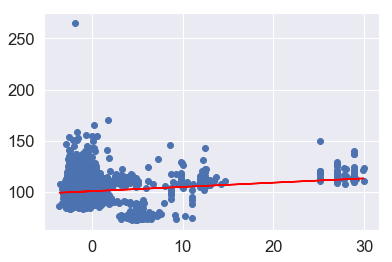

In [880]:
plt.scatter(x_train, y_train)
plt.plot(x_train, linear_regressor.predict(x_train), color='red')
plt.show()

In [881]:
linear_regressor.intercept_

100.68121532556151

In [882]:
linear_regressor.coef_

array([0.4166305])

In [883]:
linear_regressor.score(x_test,y_test)

0.01208889288785353

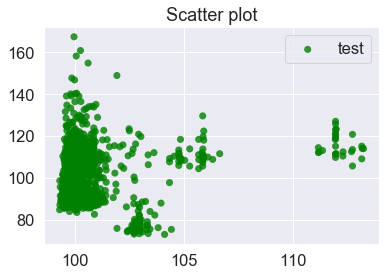

In [884]:
data = (linear_regressor.predict(x_test),y_test)
colors = ("red", "green")
groups = ("pred", "test")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
    x = linear_regressor.predict(x_test)
    y = y_test
ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=50, label=group)

plt.title('Scatter plot')
plt.legend()
plt.show()


In [885]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [886]:
model1=sm.OLS(y_train,x_train)

In [887]:
result = model1.fit()

In [888]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.549
Date:                Fri, 17 May 2019   Prob (F-statistic):              0.213
Time:                        19:35:29   Log-Likelihood:                -17029.
No. Observations:                2820   AIC:                         3.406e+04
Df Residuals:                    2819   BIC:                         3.407e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4658      0.374      1.245      0.2

# Xgboosting

In [889]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error  

In [890]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.5,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [891]:
xg_reg.fit(x_train,y_train)

pred_xg = xg_reg.predict(x_test)
pred_xg

array([109.15138 , 102.29665 ,  98.998055, ..., 101.88723 , 109.15138 ,
        98.998055], dtype=float32)

In [892]:
np.sqrt(mean_squared_error(y_test, pred_xg))*100

1158.4910737311545

In [893]:
from sklearn.metrics import r2_score
r2_score(y_test, pred_xg) 

0.13960680733516362

# Final Prediction using xgboosting

In [894]:
pd.DataFrame(zip(df['ID'],pred_xg.tolist()),columns=["names","predictions"]).head()

,names,predictions
0,0,109.151382
1,1,102.296654
2,2,98.998055
3,3,82.615288
4,4,98.998055
